# TRAITEMENT DES DONNEES LAPI : METHODE ET RESULTATS

In [1]:
%load_ext autoreload
%autoreload 2
import sys #c'est pas propre mais pour le moment pour importer mes modules perso dans le notebook je ne sais pas faire
sys.path.append(r'C:\Users\martin.schoreisz\git\Outils\Outils\Martin_Perso')
import Import_Forme as i_f
import transit
import trajets
import Correction_transit as corr
import Traitements_complets as tc
import graphs as g
import Resultats as r
import Nationalite as n
import pandas as pd
import numpy as np
import altair as alt
from altair_saver import save
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)
alt.data_transformers.enable('default', max_rows=None)
import os, math, re

**Avec le code ci-dessous on peut passer le chapitre 1 en important directement les données de passages traitees**

In [2]:
df_passages_immat_ok = r.ouvrir_donnees(r'C:\Users\martin.schoreisz\Documents\temp\LAPI\C17SI0073_LAPI\Traitements\python\donnees_sources\df_passages_immat_ok.json')
df_passages_immat_ok.set_index('created', inplace=True)

**Avec le code ci-dessous on peut passer les chapitre 1,2,3,4,5 en important directement les données de passages traitees et les données résultats**

In [3]:
dico_df_od_final = {}
dico_df_od_final['df_od_final_marge60'] = r.ouvrir_donnees(r'C:\Users\martin.schoreisz\Documents\temp\LAPI\C17SI0073_LAPI\Projet Rapport\resultats\df_od_final_marge60.json')

# 1. import des données, traitement de mise en forme
## 1.1 Import
Les données sont importées sur la période du 24/01/19 au 23/02/19, sur laquelle il n'y a pas de manque de données à priori

In [48]:
%time df_passages_source, df_plaques, df_immat=i_f.ouvrir_fichier_lapi_final('2019-01-22 23:00:00','2019-02-13 22:59:59')

Wall time: 31min 12s


In [ ]:
#export au format svg des données TV
for i in range(1,20) :
    chemin=os.path.join(r'Q:\DAIT\TI\DREAL33\2018\C17SI0073_LAPI\Traitements\python\graphs\nb_veh_J_cam',f'cam{i}.svg')
    g.graph_nb_veh_jour_camera_multi_j(df_passages,'2019-01-23 00:00:00','2019-01-23 23:59:59',i,22).save(chemin)

## 1.2 Recalage temporel
> suite à pb dans la base dedonnées il faut ajouter 1h à tous les passages

In [4]:
%time df_passages_source=i_f.recalage_passage_1h(df_passages_source)

Wall time: 328 ms


## 1.3 Ajout de l'attribut de différenciation VL / PL

In [7]:
%time df_passages2=i_f.affecter_type(df_passages_source,df_immat)

Wall time: 4min 26s


In [8]:
%time df_passages3=i_f.affecter_type_nuit(df_passages2)

Wall time: 38.2 s


### différenciation VL / PL

In [9]:
df_passages_pl=df_passages3.loc[df_passages3['l']==1].copy()

## 1.2. Suppression des doublons

### 1.2.1 Doublons

In [10]:
%%time 
df_passages_pl_ss_doublons=i_f.supprimer_doublons(df_passages_pl)

Wall time: 8.87 s


### 1.2.2 passages proches

In [11]:
%%time 
#pour traitement
passg_pl_recale_cam10=i_f.recalage_cam10(df_passages_pl_ss_doublons)

Wall time: 1min 23s


## 1.4. Filtre des immatriculations non cohérentes

In [12]:
%%time 
df_passages_immat_ok, df_immat_suppr=i_f.filtre_plaque_non_valable(passg_pl_recale_cam10, df_plaques)

Wall time: 4min 58s


## 1.5 Comparaison lapi - gestionnaire
> Utile pour comparer avec les données gestionnaire, voir avec Gille si donnes de gestionnaires mises en forme

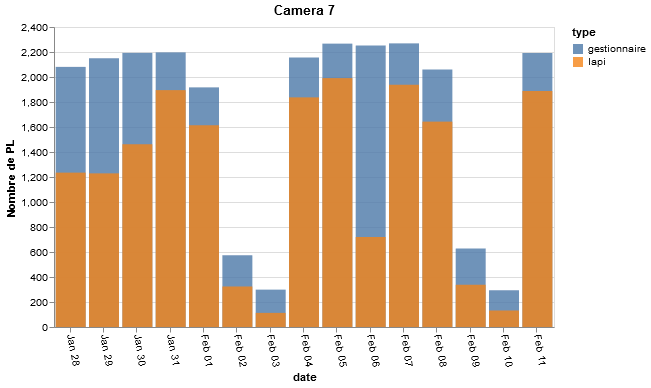

In [3]:
#comparaison des données sur une camera
g.comp_lapi_gest(df_passages_immat_ok,i_f.donnees_gest_jour,7)

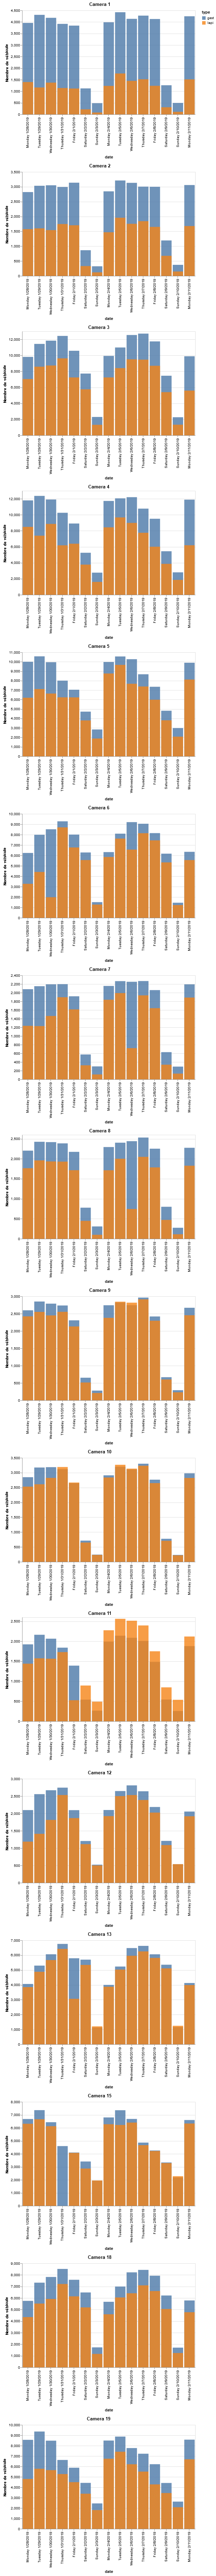

In [1646]:
# comparaison des données sur plsuieurs camera
g.comp_lapi_gest_multicam(df_passages_immat_ok,i_f.donnees_gest_jour)

# 2. Identifier les trajets de transit

In [ ]:
%time dico_od,  dico_passag, dico_tps_max=transit.transit_temps_complet('2019-01-22 00:00:00',23,df_passages_immat_ok)

date : 2019-01-22 00:00:00 debut_traitement : 2019-11-12 17:08:05.571715
date : 2019-01-23 00:00:00 debut_traitement : 2019-11-12 17:08:10.461138
date : 2019-01-24 00:00:00 debut_traitement : 2019-11-12 17:09:25.698539
date : 2019-01-25 00:00:00 debut_traitement : 2019-11-12 17:10:47.197632
date : 2019-01-26 00:00:00 debut_traitement : 2019-11-12 17:12:03.128926
date : 2019-01-27 00:00:00 debut_traitement : 2019-11-12 17:13:09.235267
date : 2019-01-28 00:00:00 debut_traitement : 2019-11-12 17:13:59.552170
date : 2019-01-29 00:00:00 debut_traitement : 2019-11-12 17:15:30.883599
date : 2019-01-30 00:00:00 debut_traitement : 2019-11-12 17:17:18.767449
date : 2019-01-31 00:00:00 debut_traitement : 2019-11-12 17:19:01.081180


In [7]:
%time g.graph_trajet_multiple(dico_od,'2019-01-23','A10-A63',22)

In [200]:
%%time
r.save_donnees(dico_od, r'Q:\DAIT\TI\DREAL33\2018\C17SI0073_LAPI\Traitements\python\donnees_sources\dico_base\dico_od.json')
r.save_donnees(dico_passag, r'Q:\DAIT\TI\DREAL33\2018\C17SI0073_LAPI\Traitements\python\donnees_sources\dico_base\dico_passag.json')
r.save_donnees(dico_tps_max, r'Q:\DAIT\TI\DREAL33\2018\C17SI0073_LAPI\Traitements\python\donnees_sources\dico_base\dico_tps_max.json')

Wall time: 19.1 s


# 3. Filtrer les trajets selon un temps de parcours

## 3.1 Dataframe des temps de parcours de base

In [ ]:
%time dixco_tpsmax_corrige=corr.corriger_df_tps_parcours(dico_tps_max)

In [202]:
r.save_donnees(dixco_tpsmax_corrige, r'Q:\DAIT\TI\DREAL33\2018\C17SI0073_LAPI\Traitements\python\donnees_sources\dico_base\dixco_tpsmax_corrige.json')

## 3.2 Identification du trafic de transit sans marge

In [ ]:
#affectation des temps de parcours de reference
%time df_transit_tps_ref=transit.jointure_temps_reel_theorique(dico_od,dixco_tpsmax_corrige,i_f.liste_complete_trajet)

In [ ]:
#df des transit avec marge 0 ss extrapolation
%time df_transit_marge0_ss_extrapolation=transit.identifier_transit(df_transit_tps_ref, 0)

In [205]:
r.save_donnees(df_transit_marge0_ss_extrapolation, r'Q:\DAIT\TI\DREAL33\2018\C17SI0073_LAPI\Traitements\python\donnees_sources\df_marge0\df_transit_marge0_ss_extrapolation.json')

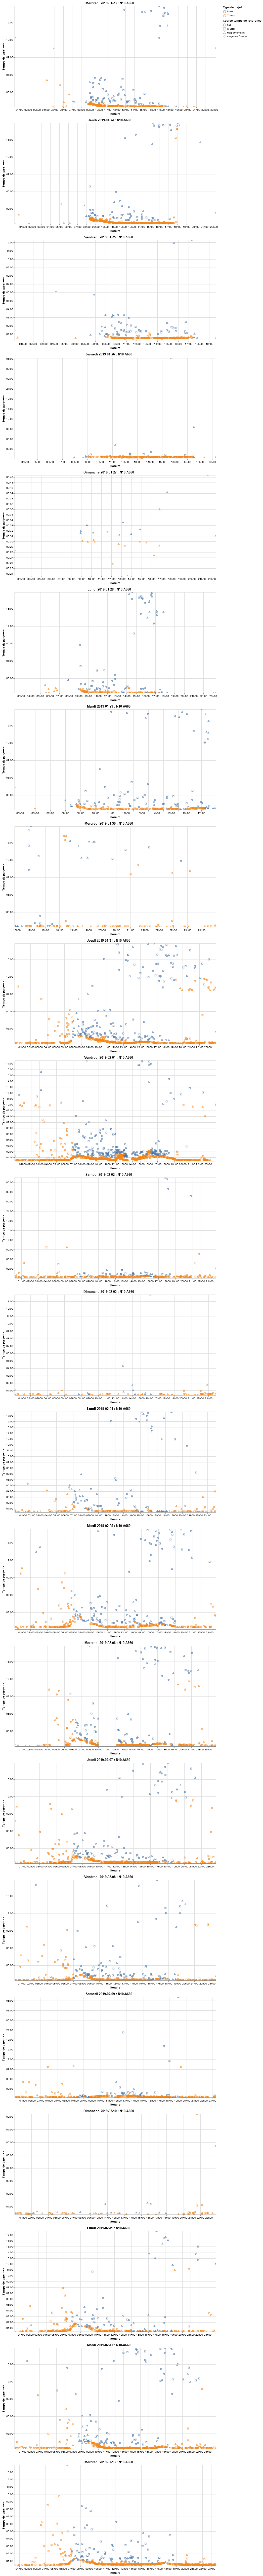

In [629]:
g.graph_transit_filtre_multiple(df_transit_marge0_ss_extrapolation,'2019-01-23 00:00:00', '2019-01-23 23:59:59','N10-A660',22)

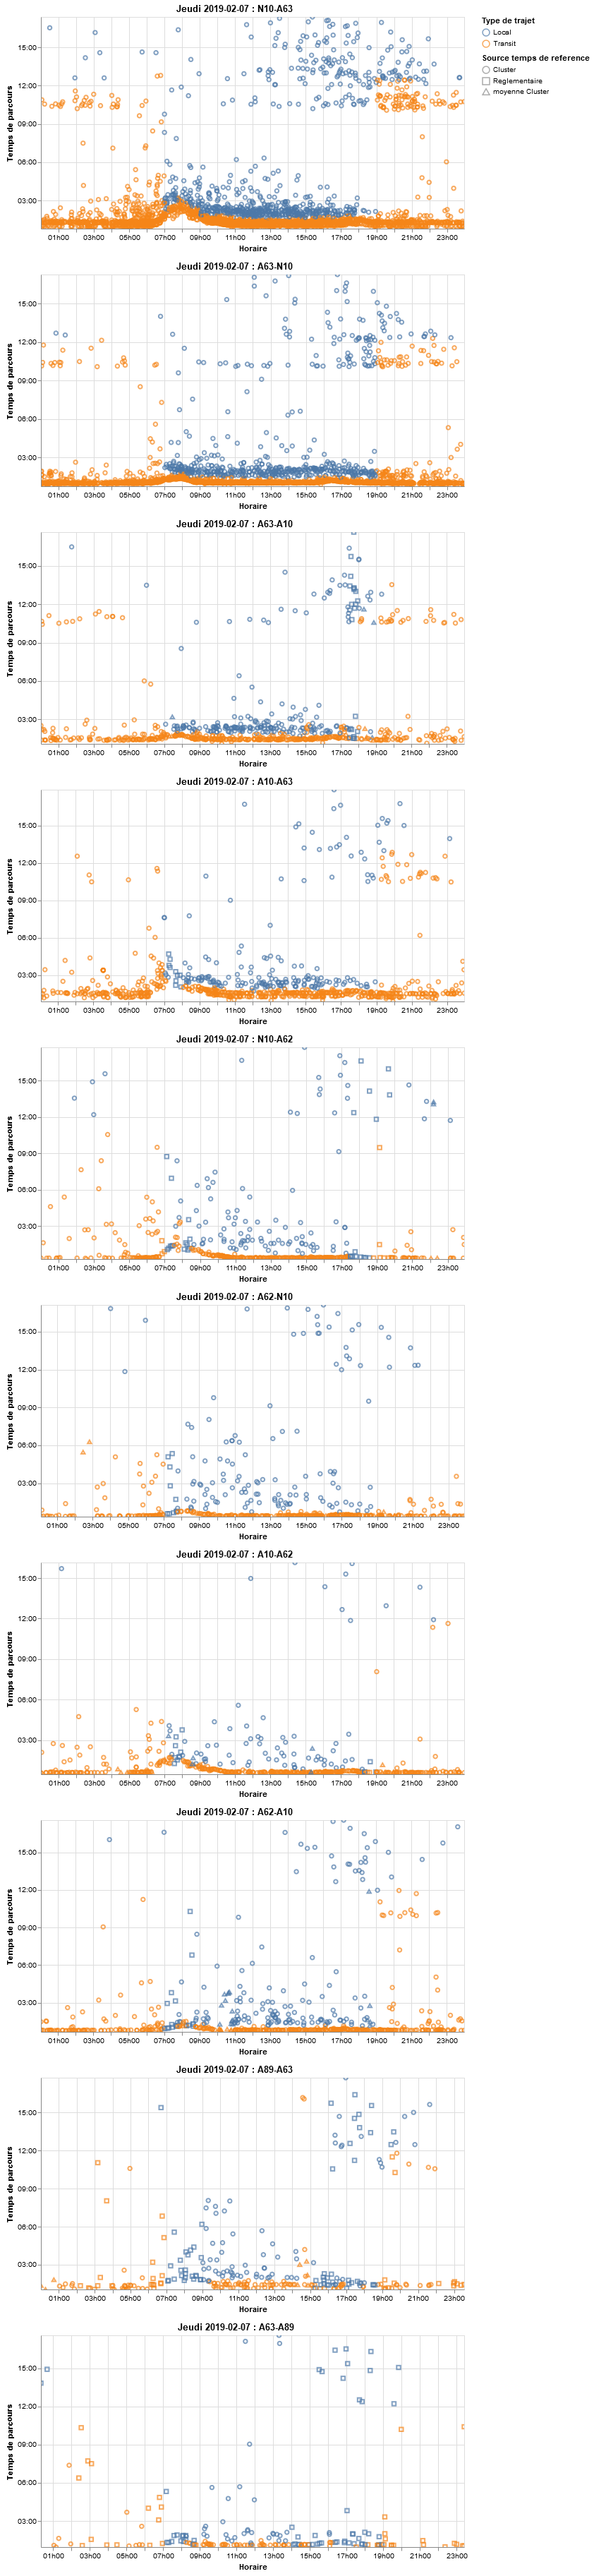

In [191]:
alt.VConcatChart(vconcat=([g.graph_transit_filtre(df_transit_marge0_ss_extrapolation,'2019-02-07 00:00:00', '2019-02-07 23:59:59',trajet)
 for trajet in ['N10-A63', 'A63-N10','A63-A10','A10-A63','N10-A62','A62-N10','A10-A62','A62-A10','A89-A63', 'A63-A89' ]]))

## 3.3 Extrapolation pour recuperer les trajets manquants 

In [ ]:
%time df_transit_extrapole=corr.predire_ts_trajets(df_transit_marge0_ss_extrapolation)

***exemple d'impact de l'extrapolation***

In [131]:
alt.vconcat(g.graph_transit_filtre_multiple(df_transit_marge0_ss_extrapolation,'2019-01-23 00:00:00', '2019-01-23 23:59:59','A89-A660', 1),
g.graph_transit_filtre_multiple(df_transit_extrapole,'2019-01-23 00:00:00', '2019-01-23 23:59:59','A89-A660', 1)) 

***modification du dico des temps max avec ajout des temps de référence issu de l'extrapolation <br> modification du temps filtre dans la df_transit_extrapole***

In [ ]:
%time df_transit_extrapole_tps_filtre_modif, dixco_tpsmax_corrige=corr.corriger_tps_parcours_extrapole(dixco_tpsmax_corrige,df_transit_extrapole)

## 3.4 Prendre en compte les aires entre Cestas et A63
> L'idée est que si le PL fait un trajet depuis ou vers A63 et qu'il est vu à Cestas, alors on va prendre en compte comm etemps de référence le temps entre Cestas et la l'entrée ou la sortuie du dispositif LAPI, pour s'abroger des temps de pause sur les grosses aires de A63

In [ ]:
#creation des attributs relatifs a Cestas, pour les PL sur une O-D liées à A63, non identifiés comme transit, et qui ont été vus à Cestas
%time df_transit_A63_redresse=corr.correction_temps_cestas(df_transit_extrapole_tps_filtre_modif,df_passages_immat_ok,dixco_tpsmax_corrige)

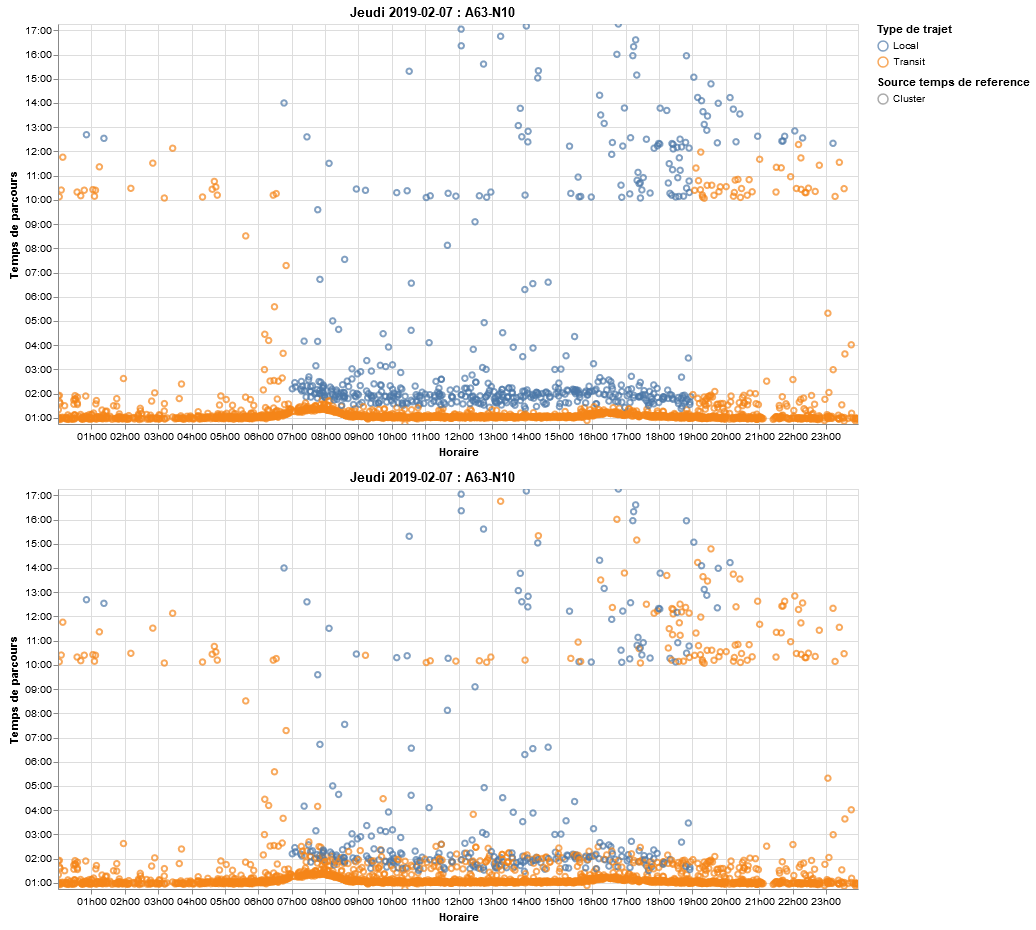

In [277]:
#graph
alt.vconcat(g.graph_transit_filtre(df_transit_marge0_ss_extrapolation,'2019-02-07 00:00:00', '2019-02-07 23:59:59','A63-N10'),
g.graph_transit_filtre(test,'2019-02-07 00:00:00', '2019-02-07 23:59:59','A63-N10'))

## 3.5 dico des df de transit sans marge 
> contient une clé : 
- vers les données relatives aux transit selon le temps des aires A63 
- vers les données du reste des transit 
- vers les données totales sans le filtre du temps de parcours - vers les données totales avec le filtre du temps de parcours

In [ ]:
%time dico_transit_ss_marge=transit.transit_marge0(df_transit_extrapole_tps_filtre_modif,df_transit_A63_redresse)

In [231]:
r.save_donnees(dico_transit_ss_marge['df_transit_airesA63_ss_filtre'], 
               r'Q:\DAIT\TI\DREAL33\2018\C17SI0073_LAPI\Traitements\python\donnees_sources\df_marge0\df_transit_airesA63_ss_filtre.json')
r.save_donnees(dico_transit_ss_marge['df_transit_airesA63_avec_filtre'], 
               r'Q:\DAIT\TI\DREAL33\2018\C17SI0073_LAPI\Traitements\python\donnees_sources\df_marge0\df_transit_airesA63_avec_filtre.json')
r.save_donnees(dico_transit_ss_marge['df_transit_pas_airesA63_ss_filtre'], 
               r'Q:\DAIT\TI\DREAL33\2018\C17SI0073_LAPI\Traitements\python\donnees_sources\df_marge0\df_transit_pas_airesA63_ss_filtre.json')
r.save_donnees(dico_transit_ss_marge['df_transit_marge0_ss_filtre'], 
               r'Q:\DAIT\TI\DREAL33\2018\C17SI0073_LAPI\Traitements\python\donnees_sources\df_marge0\df_transit_marge0_ss_filtre.json')
r.save_donnees(dico_transit_ss_marge['df_transit_marge0_avec_filtre'], 
               r'Q:\DAIT\TI\DREAL33\2018\C17SI0073_LAPI\Traitements\python\donnees_sources\df_marge0\df_transit_marge0_avec_filtre.json')

## 3.6 appliquer une marge 
>On applique une marge que sur les données non relatives aux aires A63. Attention, sur les o_d relatives à A63, il y a déjà une marge de 20 minutes due aux limites du Cluster <br> le truc c'est aussi qu ej'applique 30 min de plus de marge sur es trajets à destination de A63 non vus à Cestas

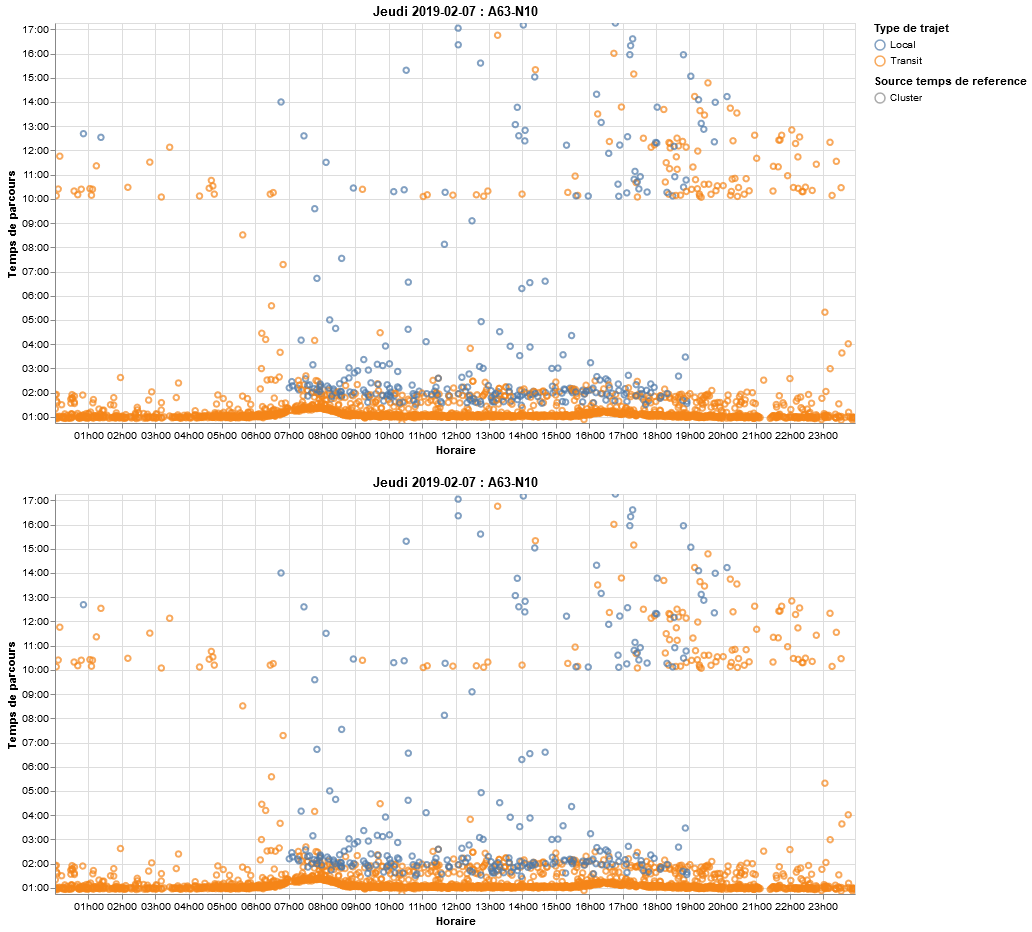

In [33]:
alt.vconcat(g.graph_transit_filtre(dico_transit_ss_marge['df_transit_marge0_ss_filtre'],'2019-02-07 00:00:00', '2019-02-07 23:59:59','A63-N10'),
            g.graph_transit_filtre(total,'2019-02-07 00:00:00', '2019-02-07 23:59:59','A63-N10'))

In [ ]:
%time dico_transit_avec_marge=tc.appliquer_marge([45,60,90,120],dico_transit_ss_marge['df_transit_airesA63_avec_filtre'],dico_transit_ss_marge['df_transit_pas_airesA63_ss_filtre'])

In [235]:
r.save_donnees(dico_transit_avec_marge['df_transit_marge45_avec_filtre'], 
               r'Q:\DAIT\TI\DREAL33\2018\C17SI0073_LAPI\Traitements\python\donnees_sources\df_marges\df_transit_marge45_avec_filtre.json')
r.save_donnees(dico_transit_avec_marge['df_transit_marge60_avec_filtre'], 
               r'Q:\DAIT\TI\DREAL33\2018\C17SI0073_LAPI\Traitements\python\donnees_sources\df_marges\df_transit_marge60_avec_filtre.json')
r.save_donnees(dico_transit_avec_marge['df_transit_marge90_avec_filtre'], 
               r'Q:\DAIT\TI\DREAL33\2018\C17SI0073_LAPI\Traitements\python\donnees_sources\df_marges\df_transit_marge90_avec_filtre.json')
r.save_donnees(dico_transit_avec_marge['df_transit_marge120_avec_filtre'], 
               r'Q:\DAIT\TI\DREAL33\2018\C17SI0073_LAPI\Traitements\python\donnees_sources\df_marges\df_transit_marge120_avec_filtre.json')

# 4. Correction des trajets depuis ou vers A660 relatifs à A63

In [ ]:
%time dico_corr_A63_A660=tc.correction_A660(dico_transit_avec_marge,df_passages_immat_ok,[45,60,90,120])

In [238]:
r.save_donnees(dico_corr_A63_A660['corr_A63_A66045'], 
               r'Q:\DAIT\TI\DREAL33\2018\C17SI0073_LAPI\Traitements\python\donnees_sources\df_corrA660A63\corr_A63_A66045.json')
r.save_donnees(dico_corr_A63_A660['corr_A63_A66060'], 
               r'Q:\DAIT\TI\DREAL33\2018\C17SI0073_LAPI\Traitements\python\donnees_sources\df_corrA660A63\corr_A63_A66060.json')
r.save_donnees(dico_corr_A63_A660['corr_A63_A66090'], 
               r'Q:\DAIT\TI\DREAL33\2018\C17SI0073_LAPI\Traitements\python\donnees_sources\df_corrA660A63\corr_A63_A66090.json')
r.save_donnees(dico_corr_A63_A660['corr_A63_A660120'], 
               r'Q:\DAIT\TI\DREAL33\2018\C17SI0073_LAPI\Traitements\python\donnees_sources\df_corrA660A63\corr_A63_A660120.json')

# 5. Extrapolation des trajets non complets

In [ ]:
%time dico_df_od_final=tc.extrapol_trajets_incomplets(dico_transit_avec_marge,df_passages_immat_ok,dico_corr_A63_A660,[45,60], dixco_tpsmax_corrige)

# SAUVEGARDE RESULTATS

In [15]:
#resultats
r.save_donnees(dico_df_od_final['df_od_final_marge45'],
               r'Q:\DAIT\TI\DREAL33\2018\C17SI0073_LAPI\Projet Rapport\resultats\df_od_final_marge45.json')
r.save_donnees(dico_df_od_final['df_od_final_marge60'],
               r'Q:\DAIT\TI\DREAL33\2018\C17SI0073_LAPI\Projet Rapport\resultats\df_od_final_marge60.json')


# 6. Créer les tableaux de matrice o_d

## 6.1 Resultats

### 6.1.1 Nb total de veh sur la periode

In [4]:
%time df_transit_propre, df_filtree = r.filtrer_jour_non_complet(dico_df_od_final['df_od_final_marge60'])

Wall time: 23.9 s


In [5]:
%time df_transit, df_avant31, df_apres31 = r.decoupe_df_avant_apres_31(df_transit_propre)

Wall time: 39 ms


In [10]:
r.matrice_transit(r.df_transit_propre_jo(df_apres31), type_j='jo_sup_31')

destination    A10    A62     A63   A660    A89     N10
origine                                                
A10            NaN  384.0   616.0  116.0   23.0     NaN
A62          403.0    NaN    35.0   63.0   67.0   421.0
A63          664.0   26.0     NaN    NaN  171.0  2986.0
A660          87.0   53.0     NaN    NaN   58.0   266.0
A89           21.0   55.0   189.0   74.0    NaN     NaN
N10            NaN  318.0  2402.0  293.0    NaN     NaN

In [21]:
r.matrice_transit(r.df_transit_propre_jo(df_avant31),type_j='jo_inf_31')

destination    A10    A62     A63   A660    A89     N10
origine                                                
A10            NaN  227.0   410.0   52.0   12.0     NaN
A62          236.0    NaN    36.0   50.0   42.0   417.0
A63          378.0   23.0     NaN    NaN  125.0  2380.0
A660          52.0   35.0     NaN    NaN   42.0   208.0
A89           14.0   51.0   216.0   72.0    NaN     NaN
N10            NaN  205.0  1496.0  120.0    NaN     NaN

In [22]:
r.matrice_transit(r.df_transit_propre_jo(df_transit),type_j='jo')

destination    A10    A62     A63   A660    A89     N10
origine                                                
A10            NaN  331.0   534.0   92.0   19.0     NaN
A62          337.0    NaN    35.0   58.0   57.0   420.0
A63          542.0   25.0     NaN    NaN  151.0  2743.0
A660          73.0   46.0     NaN    NaN   52.0   244.0
A89           18.0   54.0   201.0   73.0    NaN     NaN
N10            NaN  292.0  2123.0  243.0    NaN     NaN

## 6.2 Illsutrations impacts des paramètres

In [23]:
%%time 
#variables
mat_df_transit_marge0_ss_extrapolation=r.matrice_transit(r.df_transit_propre_jo(r.decoupe_df_avant_apres_31(r.filtrer_jour_non_complet(
    df_transit_marge0_ss_extrapolation.loc[df_transit_marge0_ss_extrapolation['filtre_tps']==1])[0])[2]),'jo_sup_31')

Wall time: 57.3 s


In [24]:
mat_df_transit_marge0_ss_extrapolation

destination    A10    A62     A63   A660    A89     N10
origine                                                
A10            NaN  371.0   510.0  147.0   21.0     NaN
A62          397.0    NaN    18.0   59.0   61.0   417.0
A63          522.0   12.0     NaN    NaN  113.0  2390.0
A660         154.0   59.0     NaN    NaN   71.0   564.0
A89           18.0   50.0   130.0   82.0    NaN     NaN
N10            NaN  305.0  1915.0  473.0    NaN     NaN

In [25]:
mat_df_transit_extrapole=r.matrice_transit(r.df_transit_propre_jo(r.decoupe_df_avant_apres_31(r.filtrer_jour_non_complet(
    df_transit_extrapole.loc[df_transit_extrapole['filtre_tps']==1])[0])[2]),'jo_sup_31')
mat_df_transit_extrapole

destination    A10    A62     A63   A660    A89     N10
origine                                                
A10            NaN  379.0   514.0  159.0   23.0     NaN
A62          401.0    NaN    18.0   68.0   67.0   420.0
A63          530.0   12.0     NaN    NaN  132.0  2396.0
A660         154.0   59.0     NaN    NaN   78.0   564.0
A89           21.0   55.0   144.0   90.0    NaN     NaN
N10            NaN  315.0  1915.0  479.0    NaN     NaN

In [26]:
mat_dico_transit_ss_marge=r.matrice_transit(r.df_transit_propre_jo(r.decoupe_df_avant_apres_31(r.filtrer_jour_non_complet(
    dico_transit_ss_marge['df_transit_marge0_avec_filtre'])[0])[2]),'jo_sup_31')

In [27]:
mat_dico_transit_ss_marge

destination    A10    A62     A63   A660    A89     N10
origine                                                
A10            NaN  379.0   581.0  159.0   23.0     NaN
A62          401.0    NaN    30.0   68.0   67.0   420.0
A63          597.0   19.0     NaN    NaN  153.0  2703.0
A660         154.0   59.0     NaN    NaN   78.0   564.0
A89           21.0   55.0   176.0   90.0    NaN     NaN
N10            NaN  315.0  2259.0  479.0    NaN     NaN

In [28]:
mat_dico_transit_avec_marge=r.matrice_transit(r.df_transit_propre_jo(r.decoupe_df_avant_apres_31(r.filtrer_jour_non_complet(
    dico_transit_avec_marge['df_transit_marge60_avec_filtre'])[0])[2]),'jo_sup_31')

In [29]:
mat_dico_transit_avec_marge

destination    A10    A62     A63   A660    A89     N10
origine                                                
A10            NaN  380.0   587.0  159.0   23.0     NaN
A62          401.0    NaN    32.0   68.0   67.0   420.0
A63          622.0   21.0     NaN    NaN  160.0  2768.0
A660         154.0   59.0     NaN    NaN   78.0   564.0
A89           21.0   55.0   179.0   91.0    NaN     NaN
N10            NaN  316.0  2280.0  479.0    NaN     NaN

In [30]:
mat_dico_corr_A63_A660=r.matrice_transit(r.df_transit_propre_jo(r.decoupe_df_avant_apres_31(r.filtrer_jour_non_complet(
    dico_corr_A63_A660['corr_A63_A66060'])[0])[2]),'jo_sup_31')

In [31]:
mat_dico_corr_A63_A660

destination    A10    A62     A63   A660    A89     N10
origine                                                
A10            NaN  380.0   616.0  116.0   23.0     NaN
A62          401.0    NaN    35.0   63.0   67.0   420.0
A63          664.0   26.0     NaN    NaN  170.0  2968.0
A660          87.0   53.0     NaN    NaN   58.0   266.0
A89           21.0   55.0   189.0   74.0    NaN     NaN
N10            NaN  316.0  2402.0  293.0    NaN     NaN

In [32]:
mat_dico_df_od_final=r.matrice_transit(r.df_transit_propre_jo(r.decoupe_df_avant_apres_31(r.filtrer_jour_non_complet(
    dico_df_od_final['df_od_final_marge60'])[0])[2]),'jo_sup_31')

In [33]:
mat_dico_df_od_final

destination    A10    A62     A63   A660    A89     N10
origine                                                
A10            NaN  384.0   616.0  116.0   23.0     NaN
A62          403.0    NaN    35.0   63.0   67.0   421.0
A63          664.0   26.0     NaN    NaN  171.0  2986.0
A660          87.0   53.0     NaN    NaN   58.0   266.0
A89           21.0   55.0   189.0   74.0    NaN     NaN
N10            NaN  318.0  2402.0  293.0    NaN     NaN

### 6.2.1 Impact methode de prediction sur marge0

In [34]:
((mat_df_transit_extrapole /  mat_df_transit_marge0_ss_extrapolation)-1)*100

destination        A10        A62        A63       A660        A89       N10
origine                                                                     
A10                NaN   2.156334   0.784314   8.163265   9.523810       NaN
A62           1.007557        NaN   0.000000  15.254237   9.836066  0.719424
A63           1.532567   0.000000        NaN        NaN  16.814159  0.251046
A660          0.000000   0.000000        NaN        NaN   9.859155  0.000000
A89          16.666667  10.000000  10.769231   9.756098        NaN       NaN
N10                NaN   3.278689   0.000000   1.268499        NaN       NaN

In [35]:
mat_df_transit_extrapole -  mat_df_transit_marge0_ss_extrapolation

destination  A10   A62   A63  A660   A89  N10
origine                                      
A10          NaN   8.0   4.0  12.0   2.0  NaN
A62          4.0   NaN   0.0   9.0   6.0  3.0
A63          8.0   0.0   NaN   NaN  19.0  6.0
A660         0.0   0.0   NaN   NaN   7.0  0.0
A89          3.0   5.0  14.0   8.0   NaN  NaN
N10          NaN  10.0   0.0   6.0   NaN  NaN

### 6.2.2 impact prise en compte aires

In [36]:
((mat_dico_transit_ss_marge/mat_df_transit_extrapole)-1)*100

destination        A10        A62        A63  A660        A89        N10
origine                                                                 
A10                NaN   0.000000  13.035019   0.0   0.000000        NaN
A62           0.000000        NaN  66.666667   0.0   0.000000   0.000000
A63          12.641509  58.333333        NaN   NaN  15.909091  12.813022
A660          0.000000   0.000000        NaN   NaN   0.000000   0.000000
A89           0.000000   0.000000  22.222222   0.0        NaN        NaN
N10                NaN   0.000000  17.963446   0.0        NaN        NaN

In [37]:
mat_dico_transit_ss_marge-mat_df_transit_extrapole

destination   A10  A62    A63  A660   A89    N10
origine                                         
A10           NaN  0.0   67.0   0.0   0.0    NaN
A62           0.0  NaN   12.0   0.0   0.0    0.0
A63          67.0  7.0    NaN   NaN  21.0  307.0
A660          0.0  0.0    NaN   NaN   0.0    0.0
A89           0.0  0.0   32.0   0.0   NaN    NaN
N10           NaN  0.0  344.0   0.0   NaN    NaN

### 6.2.3 Impact marge 60

In [38]:
#pour rappel, marg ede 60 minutes uniquement pour PL depuis ou vers A63, non vu à Cestas. pour le reste : 15 min
((mat_dico_transit_avec_marge/mat_dico_transit_ss_marge)-1)*100

destination       A10        A62       A63      A660       A89       N10
origine                                                                 
A10               NaN   0.263852  1.032702  0.000000  0.000000       NaN
A62          0.000000        NaN  6.666667  0.000000  0.000000  0.000000
A63          4.187605  10.526316       NaN       NaN  4.575163  2.404735
A660         0.000000   0.000000       NaN       NaN  0.000000  0.000000
A89          0.000000   0.000000  1.704545  1.111111       NaN       NaN
N10               NaN   0.317460  0.929615  0.000000       NaN       NaN

In [39]:
mat_dico_transit_avec_marge-mat_dico_transit_ss_marge

destination   A10  A62   A63  A660  A89   N10
origine                                      
A10           NaN  1.0   6.0   0.0  0.0   NaN
A62           0.0  NaN   2.0   0.0  0.0   0.0
A63          25.0  2.0   NaN   NaN  7.0  65.0
A660          0.0  0.0   NaN   NaN  0.0   0.0
A89           0.0  0.0   3.0   1.0  NaN   NaN
N10           NaN  1.0  21.0   0.0  NaN   NaN

### 6.2.4 impact correction A660 A63

In [40]:
((mat_dico_corr_A63_A660/mat_dico_transit_avec_marge)-1)*100

destination        A10        A62       A63       A660        A89        N10
origine                                                                     
A10                NaN   0.000000  4.940375 -27.044025   0.000000        NaN
A62           0.000000        NaN  9.375000  -7.352941   0.000000   0.000000
A63           6.752412  23.809524       NaN        NaN   6.250000   7.225434
A660        -43.506494 -10.169492       NaN        NaN -25.641026 -52.836879
A89           0.000000   0.000000  5.586592 -18.681319        NaN        NaN
N10                NaN   0.000000  5.350877 -38.830898        NaN        NaN

In [41]:
mat_dico_corr_A63_A660-mat_dico_transit_avec_marge

destination   A10  A62    A63   A660   A89    N10
origine                                          
A10           NaN  0.0   29.0  -43.0   0.0    NaN
A62           0.0  NaN    3.0   -5.0   0.0    0.0
A63          42.0  5.0    NaN    NaN  10.0  200.0
A660        -67.0 -6.0    NaN    NaN -20.0 -298.0
A89           0.0  0.0   10.0  -17.0   NaN    NaN
N10           NaN  0.0  122.0 -186.0   NaN    NaN

### 6.2.5 impact trajets non complet

In [42]:
((mat_dico_df_od_final/mat_dico_corr_A63_A660)-1)*100

destination       A10       A62  A63  A660       A89       N10
origine                                                       
A10               NaN  1.052632  0.0   0.0  0.000000       NaN
A62          0.498753       NaN  0.0   0.0  0.000000  0.238095
A63          0.000000  0.000000  NaN   NaN  0.588235  0.606469
A660         0.000000  0.000000  NaN   NaN  0.000000  0.000000
A89          0.000000  0.000000  0.0   0.0       NaN       NaN
N10               NaN  0.632911  0.0   0.0       NaN       NaN

In [43]:
mat_dico_df_od_final-mat_dico_corr_A63_A660

destination  A10  A62  A63  A660  A89   N10
origine                                    
A10          NaN  4.0  0.0   0.0  0.0   NaN
A62          2.0  NaN  0.0   0.0  0.0   1.0
A63          0.0  0.0  NaN   NaN  1.0  18.0
A660         0.0  0.0  NaN   NaN  0.0   0.0
A89          0.0  0.0  0.0   0.0  NaN   NaN
N10          NaN  2.0  0.0   0.0  NaN   NaN

# 7. Analyse du nb de VL, PL, PL en transit par heure et par camera 

In [6]:
# passages et passages de transit apres le 31/01 en JO
df_apres31_jo = r.df_transit_propre_jo(df_apres31)
df_passages_apres_31 = df_passages_immat_ok.loc[(df_passages_immat_ok.index >= pd.to_datetime('2019-01-31')) & (df_passages_immat_ok.index.dayofweek<5)]
passages_transit_apres_31 = trajets.trajet2passage(df_apres31_jo, df_passages_apres_31)

# determiner les passages fictifs Rocade
df_passage_transit_redresse_31, df_pl_redresse_31, trajets_rocade_non_vu_31 = r.passages_fictif_rocade(
    i_f.liste_trajet_rocade, df_apres31_jo, passages_transit_apres_31, df_passages_apres_31)
# passages fictifs correction A660-A63 et trajets incomplets
passage_transit_redress_31, passages_tot_redresse_31 = r.passage_fictif_od(df_apres31_jo, df_passage_transit_redresse_31, df_pl_redresse_31)
# regrouper
df_concat_pl_jo_31, df_pct_pl_transit_31 = r.pourcentage_pl_camera(passages_tot_redresse_31, passage_transit_redress_31)
# ajouter n10
# df_concat_pl_jo_31, df_pct_pl_transit_31 = r.ajout_cam_n10(df_concat_pl_jo_31, df_pct_pl_transit_31)

In [148]:
g.intervalle_confiance_cam(df_pct_pl_transit_31,df_concat_pl_jo_31,True,11,12)[0]

alt.LayerChart(...)

In [149]:
g.intervalle_confiance_cam(df_pct_pl_transit_31,df_concat_pl_jo_31,True,3,4)[1]

alt.Chart(...)

## Chiffre de transit selon comptages gestionnaires

In [34]:
# pour info
concat_dir_trafic, df_pct_pl_transit_multi_cam=r.PL_transit_dir_jo_cam(df_pct_pl_transit_31,[8])
concat_dir_trafic.loc[concat_dir_trafic['type']=='PL en transit']

heure  nb_pl           type
0       0   4.68  PL en transit
1       1   3.08  PL en transit
2       2   4.35  PL en transit
3       3   8.00  PL en transit
4       4  11.34  PL en transit
5       5  19.75  PL en transit
6       6  29.40  PL en transit
7       7   8.88  PL en transit
8       8   9.28  PL en transit
9       9  16.28  PL en transit
10     10  21.32  PL en transit
11     11  22.50  PL en transit
12     12  23.37  PL en transit
13     13  22.14  PL en transit
14     14  19.35  PL en transit
15     15  17.78  PL en transit
16     16  18.75  PL en transit
17     17  11.64  PL en transit
18     18  12.24  PL en transit
19     19  11.04  PL en transit
20     20   8.37  PL en transit
21     21   6.44  PL en transit
22     22   4.76  PL en transit
23     23   5.18  PL en transit

In [191]:
g.graph_PL_transit_dir_jo_cam(df_pct_pl_transit_31,3,4)

alt.LayerChart(...)

In [28]:
for i in [6,10,15, 8] : 
    fichier=f'nb_pl_transit_cam{i}.svg'
    g.graph_PL_transit_dir_jo_cam(df_pct_pl_transit_31,i).save(
    os.path.join(r'Q:\DAIT\TI\DREAL33\2018\C17SI0073_LAPI\Projet Rapport\illustrations\rapport\nb_pl_transit',fichier))

In [132]:
g.graph_TV_jo_cam(df_pct_pl_transit_31,False,0,3,4)

alt.Chart(...)

In [176]:
sankey_rocade_f_s_n, sankey_rocade_f_n_s, sankey_direct_tot, df_sankey=r.donnees_sankey(df_apres31)

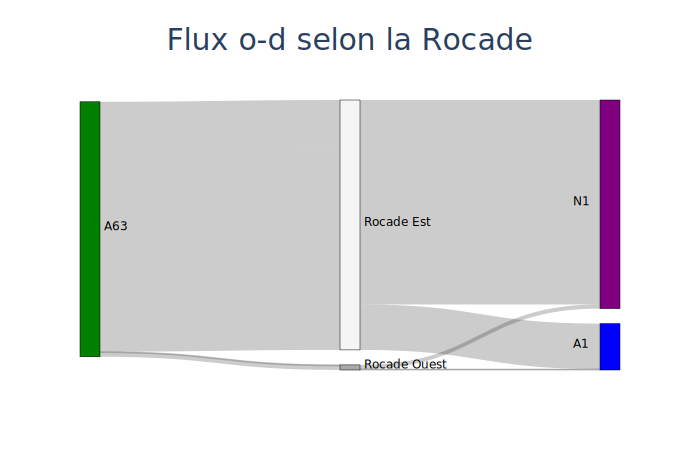

In [438]:
g.sankey(sankey_rocade_f_s_n, 'Flux o-d selon la Rocade').show(renderer='svg')
#.write_image(r'Q:\DAIT\TI\DREAL33\2018\C17SI0073_LAPI\Projet Rapport\illustrations\sankey_rocade_n_s.png')

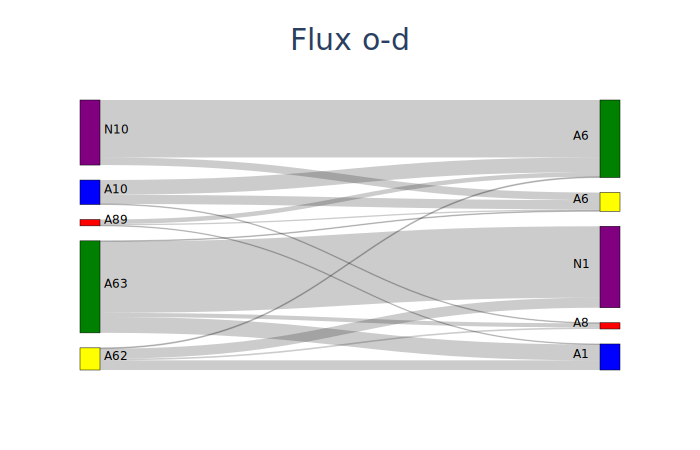

In [440]:
g.sankey(df_sankey, 'Flux o-d').show(renderer='svg')

## Produire les données csv de nb de PL Horaire en lien avce les données de comptage (carte QGis)

In [75]:
synthes_nb_veh=r.nb_pl_reel_par_site_mjo(df_pct_pl_transit_31)[0]
synthes_nb_veh.to_csv(r'Q:\DAIT\TI\DREAL33\2018\C17SI0073_LAPI\Projet Rapport\qgis\synthese_resultats.csv')

# 8. Analyse des nationalités  
pour analyser les nationalités on repart des données calculées au chapitre 7 (basée sur le 6.1 et les importde début de notebook)  
- on va d'abord regarder les passages qui ont une nationalité inconnue ou avec un doute (state ='  ' ou '/' dans state)
- ensuite on v créer un state 'simplifié' qui va regrouper ces cas dans un code 'nc'
- on va par la suite déterminer la part des les 10 pays les plus représentés, 
- si elle esttrès ignificative on va créer un state 'autre' pour simplifier la lisibilité des graphs

## Analyse globale des nationalité relevés lors des passages

In [7]:
# ouvertur des donnees de passages total et de passages transit et recherche des states inconu et de leur part : environ 5%
pctStateNcTotal = len(passages_tot_redresse_31.loc[passages_tot_redresse_31.state.apply(lambda x: x == '  ' or '/' in x)])/len(passages_tot_redresse_31)
pctStateNcTransit = len(passage_transit_redress_31.loc[passage_transit_redress_31.state.apply(lambda x: x == '  ' or '/' in x)])/len(passage_transit_redress_31)
# mettre à jour les denomination d'Etat si inconnu ou hesitation de la part de l'identification Mac
passages_tot_redresse_31['state_modif_nc'] = passages_tot_redresse_31.state.apply(lambda x: n.modifStateInconnu(x))
passage_transit_redress_31['state_modif_nc'] = passage_transit_redress_31.state.apply(lambda x: n.modifStateInconnu(x))
# mettre a jour un attribut qui classe en français / etranger
passages_tot_redresse_31['state_fr_etr'] = passages_tot_redresse_31.state.apply(lambda x: n.modifStateFrAutre(x))
passage_transit_redress_31['state_fr_etr'] = passage_transit_redress_31.state.apply(lambda x: n.modifStateFrAutre(x))

In [106]:
(df10PaysPlusRepresenteTransit, df10PaysPlusRepresenteGlobal,
 df6ZonesPlusRepresenteGlobal, df6ZonesPlusRepresenteTransit) = n.creerDataGroupeNationalite(passages_tot_redresse_31, passage_transit_redress_31)

In [107]:
(chartRepartitionGlobalPaysGeneral, chartRepartitionTransitPaysGeneral,
 chartRepartitionGlobalZoneGeneral, chartRepartitionTransitZoneGeneral) = g.graphNationalitePartGenerale(df10PaysPlusRepresenteTransit, df10PaysPlusRepresenteGlobal,
                                                                                                         df6ZonesPlusRepresenteGlobal, df6ZonesPlusRepresenteTransit)

In [101]:
chartRepartitionGlobalPaysGeneral | chartRepartitionTransitPaysGeneral

alt.HConcatChart(...)

In [108]:
chartRepartitionTransitZoneGeneral | chartRepartitionGlobalZoneGeneral

alt.HConcatChart(...)

In [13]:
# part des 10 nationalités les plus représentées par rapport au global
pct10NatPrincipaleGlobale, pct10NatPrincipaleTransit = n.partXNationalite(dfNatGlobale, 10), n.partXNationalite(dfNatTransit, 10)
pct5NatPrincipaleGlobale, pct5NatPrincipaleTransit = n.partXNationalite(dfNatGlobale, 3), n.partXNationalite(dfNatTransit, 3)
pct10NatPrincipaleGlobale, pct10NatPrincipaleTransit, pct5NatPrincipaleGlobale, pct5NatPrincipaleTransit

(0.9802302079814127,
 0.9802147105939623,
 0.8223178458602275,
 0.7826288077290846)

In [91]:
df_concat_pl_jo, df_concat_pl_joMoy = n.creerDataGraphsHorairesMoyens(passages_tot_redresse_31, passage_transit_redress_31)

## générer ou exporter des graphiques horaires

### Répartition des PL Fraçais ou étranger, par lieu, dans le trafic total ou de transit

In [ ]:
# partie export
dossierExport = r'C:\Users\martin.schoreisz\Box\Dossier_Perso\LAPI\graphsRepartitionFrEtranger_parSite'
for k, v in i_f.dico_corrsp_camera_site.items():
    print(k, v)
    g.graphNationaliteRepartitionFrEtranger(v, k, df_concat_pl_joMoy).save(os.path.join(dossierExport, f"{k.replace('/', '-')}.svg"))

In [92]:
# exemple de visu
g.graphNationaliteRepartitionFrEtranger([20, 21], 'Rocade Est', df_concat_pl_joMoy)

alt.VConcatChart(...)

### Répartition du trafic de transit ou non au sein des PL français et étrangers

In [135]:
# partie export
dossierExport = r'C:\Users\martin.schoreisz\Box\Dossier_Perso\LAPI\graphRepartitionLocalTransit_parSite'
for k, v in i_f.dico_corrsp_camera_site.items():
    print(k, v)
    g.graphNationaliteTransitLocal(v, k, df_concat_pl_joMoy).save(os.path.join(dossierExport, f"{k.replace('/', '-')}.svg"))

Rocade Est [3, 4]
Rocade Ouest [1, 2]
A10 [11, 12]
A10/N10 [5, 6]
N89 [7, 8]
A62 [9, 10]
A660 [18, 19]
A63 [13, 15]
N10 [20, 21]
Total [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 18, 19]
Rocade Ouest sens interieur [1]
Rocade Ouest sens exterieur [2]
Rocade Est sens exterieur [4]
Rocade Est sens interieur [3]
A10 vers Paris [11]
A10 vers Bordeaux [12]
A10/N10 vers Paris [5]
A10/N10 vers Bordeaux [6]
N89 vers Lyon [7]
N89 vers Bordeaux [8]
A62 vers Toulouse [9]
A62 vers Bordeaux [10]
A660 vers Arcachon [18]
A660 vers Bordeaux [19]
A63 vers Bayonne [13]
A63 vers Bordeaux [15]
N10 vers Paris [20]
N10 vers Bordeaux [21]


In [120]:
listCamera = [3, 4]
g.graphNationaliteTransitLocal(listCamera, 'N10', df_concat_pl_joMoy)

alt.VConcatChart(...)